In [9]:
!pip install opencv-python torch torchvision tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Clone YOLOv5 and Install **Requirements**

In [10]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17270/17270), 16.11 MiB | 20.54 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 17.2 MB/s eta 0:00:00


In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Run YOLOv5 on Your Prepared Data**

In [8]:
import os
image_folder = "/content/drive/My Drive/week6/photo/telegram_images"
os.listdir(image_folder)[:5]  # Check some images

['photo_2024-12-11_09-10-07 (5).jpg',
 'photo_2024-12-11_05-57-46 (1).jpg',
 'photo_2024-12-11_05-57-46.jpg',
 'photo_2024-12-11_05-57-46 (4).jpg',
 'photo_2024-12-11_05-57-46 (2).jpg']

In [12]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source "/content/drive/My Drive/week6/photo/telegram_images" --save-txt --save-conf

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['yolov5s.pt'], source=/content/drive/My Drive/week6/photo/telegram_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CPU

100% 14.1M/14.1M [00:00<00:00, 125MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters,

**Extract Detection Results**

In [13]:
import glob

result_files = glob.glob("runs/detect/exp/labels/*.txt")
detection_results = []

for file in result_files:
    with open(file, "r") as f:
        lines = f.readlines()
        image_name = os.path.basename(file).replace(".txt", ".jpg")

        for line in lines:
            data = line.strip().split()
            class_id, x_center, y_center, width, height, confidence = data
            bbox = f"{x_center},{y_center},{width},{height}"
            detection_results.append((image_name, class_id, confidence, bbox))

print("Extracted detection results:", detection_results[:5])  # Print sample results


Extracted detection results: [('photo_2024-12-24_06-32-05 (10).jpg', '39', '0.362377', '0.628516,0.549609,0.194531,0.455469'), ('photo_2024-12-24_06-32-05 (10).jpg', '75', '0.771509', '0.114844,0.749219,0.107813,0.323438'), ('photo_2024-12-31_11-36-48 (2).jpg', '41', '0.646768', '0.315714,0.791429,0.22,0.177143'), ('photo_2024-12-11_13-06-20 (7).jpg', '29', '0.487871', '0.9175,0.67451,0.119,0.075817'), ('photo_2025-01-29_05-03-04.jpg', '39', '0.370265', '0.668125,0.625,0.26125,0.705')]


**Store Detection Results in PostgreSQL**

In [14]:
!apt-get update && apt-get install -y postgresql postgresql-contrib

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 129 kB in 1s (103 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done

In [21]:
!service postgresql stop

 * Stopping PostgreSQL 14 database server
   ...done.


In [33]:
import sqlite3
import os

# Connect to SQLite
conn = sqlite3.connect("medical_yolo_results.db")
cursor = conn.cursor()

# Create table if not exists
cursor.execute("""
CREATE TABLE IF NOT EXISTS detections (
    image TEXT,
    class TEXT,
    confidence REAL,
    x_min INTEGER,
    y_min INTEGER,
    x_max INTEGER,
    y_max INTEGER
)
""")
conn.commit()

# Read YOLO output files from "yolov5/runs/detect/exp/labels/"
labels_folder = "/content/yolov5/runs/detect/exp/labels/"
image_folder = "/content/yolov5/runs/detect/exp/"

if os.path.exists(labels_folder):
    for file in os.listdir(labels_folder):
        if file.endswith(".txt"):
            image_name = file.replace(".txt", ".jpg")  # Image name

            with open(os.path.join(labels_folder, file), "r") as f:
                for line in f.readlines():
                    data = line.strip().split()
                    class_id, x_center, y_center, width, height, confidence = map(float, data)

                    # Convert class ID to class name (change this to match your dataset)
                    class_name = f"Medical Class {int(class_id)}"

                    # Save to database
                    cursor.execute("INSERT INTO detections VALUES (?, ?, ?, ?, ?, ?, ?)",
                                   (image_name, class_name, confidence, x_center, y_center, width, height))

    conn.commit()
    print("Detection results saved to SQLite database.")
else:
    print("No detection results found!")

conn.close()


Detection results saved to SQLite database.


In [34]:
import sqlite3

conn = sqlite3.connect("medical_yolo_results.db")
cursor = conn.cursor()

# Retrieve stored results
cursor.execute("SELECT * FROM detections")
rows = cursor.fetchall()

if rows:
    for row in rows:
        print(row)
else:
    print("❌ No data found in the database!")

conn.close()


('photo_2024-12-24_06-32-05 (10).jpg', 'Medical Class 39', 0.362377, 0.628516, 0.549609, 0.194531, 0.455469)
('photo_2024-12-24_06-32-05 (10).jpg', 'Medical Class 75', 0.771509, 0.114844, 0.749219, 0.107813, 0.323438)
('photo_2024-12-31_11-36-48 (2).jpg', 'Medical Class 41', 0.646768, 0.315714, 0.791429, 0.22, 0.177143)
('photo_2024-12-11_13-06-20 (7).jpg', 'Medical Class 29', 0.487871, 0.9175, 0.67451, 0.119, 0.075817)
('photo_2025-01-29_05-03-04.jpg', 'Medical Class 39', 0.370265, 0.668125, 0.625, 0.26125, 0.705)
('photo_2024-11-30_04-07-59 (1).jpg', 'Medical Class 74', 0.302292, 0.492, 0.5015, 0.434, 0.997)
('photo_2024-12-12_05-30-52.jpg', 'Medical Class 73', 0.299694, 0.50141, 0.494531, 0.343045, 0.925)
('photo_2024-12-21_06-33-06 (15) (1).jpg', 'Medical Class 54', 0.268656, 0.495909, 0.645909, 0.0736364, 0.0627273)
('photo_2024-12-21_06-33-06 (15) (1).jpg', 'Medical Class 46', 0.321508, 0.798636, 0.434091, 0.0809091, 0.09)
('photo_2024-11-19_15-40-45 (6).jpg', 'Medical Class 0', 

In [35]:
from google.colab import files

# Download database to your local computer
files.download("medical_yolo_results.db")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

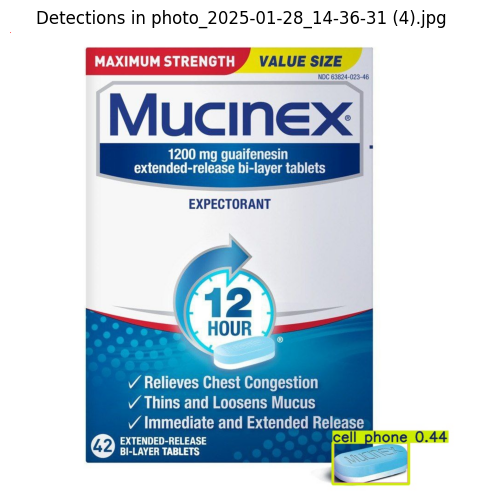

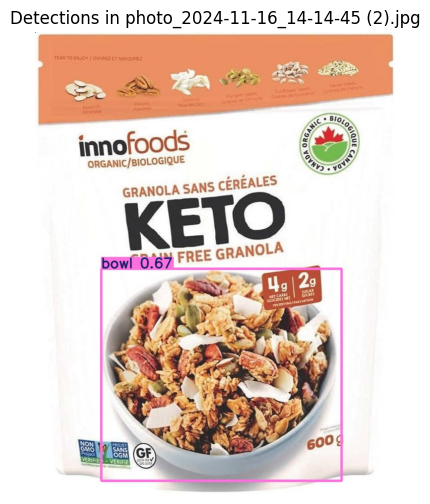

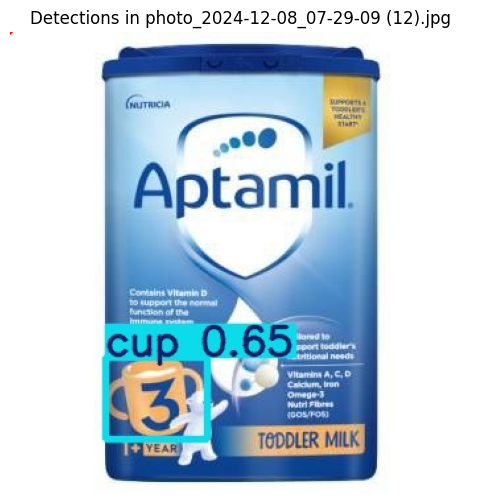

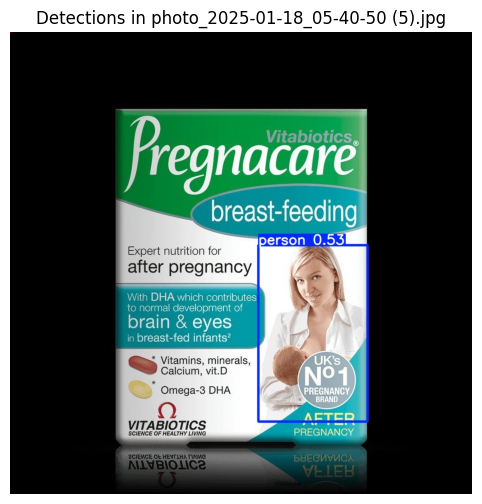

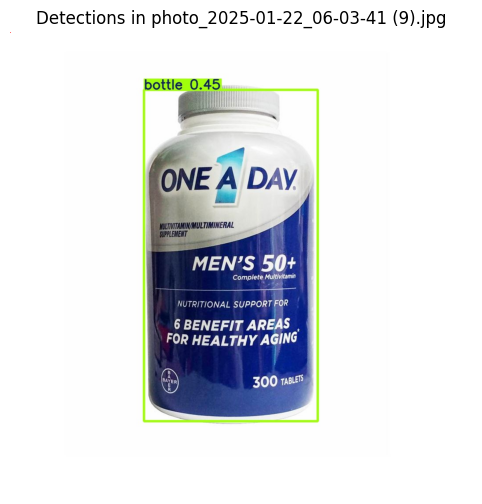

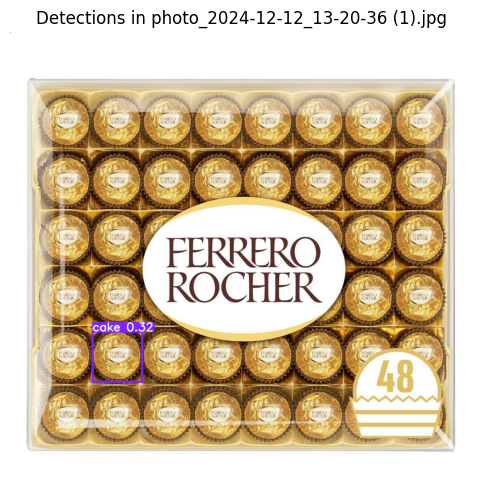

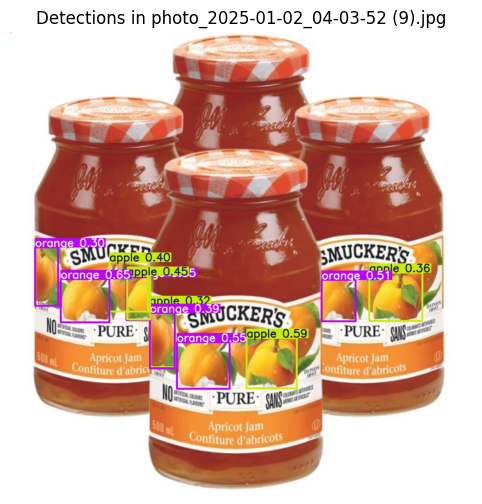

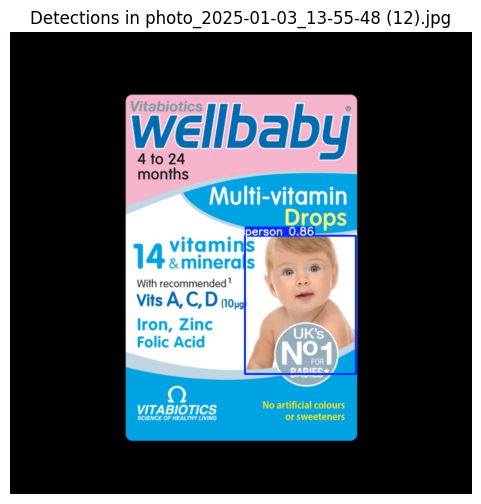

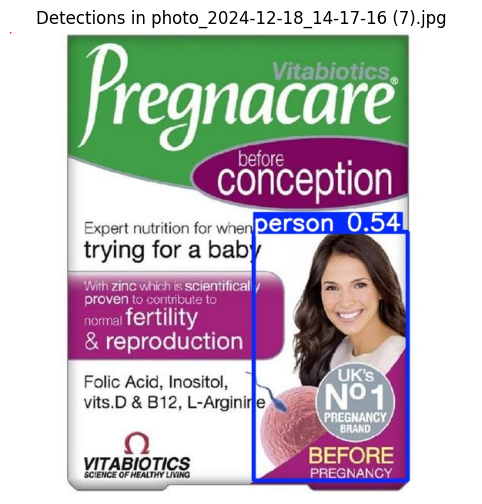

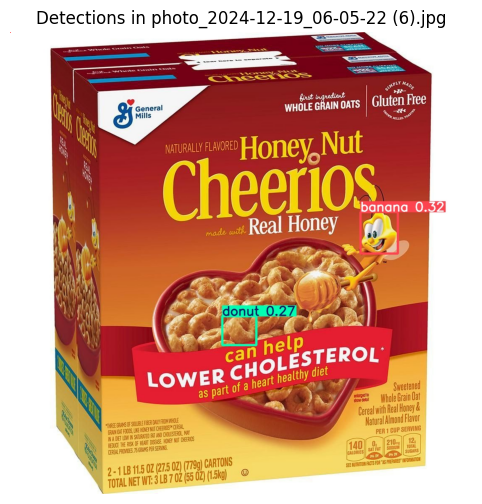

In [39]:
import sqlite3
import cv2
import matplotlib.pyplot as plt
import os
import random

# Connect to SQLite database
conn = sqlite3.connect("medical_yolo_results.db")
cursor = conn.cursor()

# Get all detection results
cursor.execute("SELECT * FROM detections")
detections = cursor.fetchall()
conn.close()

# Define the path to images
image_folder = "/content/yolov5/runs/detect/exp/"

# Create a dictionary to store detections per image
image_detections = {}
for row in detections:
    image_name, class_name, confidence, x_min, y_min, x_max, y_max = row
    if image_name not in image_detections:
        image_detections[image_name] = []
    image_detections[image_name].append((class_name, confidence, x_min, y_min, x_max, y_max))

# Select a sample of images to visualize (change to desired number)
sample_size = 10  # Change this value if needed
sample_images = random.sample(list(image_detections.keys()), min(sample_size, len(image_detections)))

# Loop through the selected images
for image_name in sample_images:
    image_path = os.path.join(image_folder, image_name)

    if os.path.exists(image_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct color display

        # Draw bounding boxes
        for (class_name, confidence, x_min, y_min, x_max, y_max) in image_detections[image_name]:
            x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])  # Convert to integers

            # Draw bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

            # Label with class & confidence
            label = f"{class_name} ({confidence:.2f})"
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Show the image
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Detections in {image_name}")
        plt.show()
    else:
        print(f"Image not found: {image_path}")


In [41]:
import os
import shutil
from google.colab import files

# Define the path where you want to save the images
save_folder = "yolov5/runs/detect/visualized/"  # Change if needed

# Create the folder if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

# Now save the images with bounding boxes
for image_name in sample_images:
    image_path = os.path.join(image_folder, image_name)

    if os.path.exists(image_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Draw bounding boxes
        for (class_name, confidence, x_min, y_min, x_max, y_max) in image_detections[image_name]:
            x_min, y_min, x_max, y_max = map(int, [x_min, y_min, x_max, y_max])
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            label = f"{class_name} ({confidence:.2f})"
            cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Save the image
        save_path = os.path.join(save_folder, image_name)
        cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
        print(f"Saved: {save_path}")
    else:
        print(f"Image not found: {image_path}")

# Zip the folder with visualized images
shutil.make_archive("visualized_images", 'zip', save_folder)

# Download the zip file
files.download("visualized_images.zip")


Saved: yolov5/runs/detect/visualized/photo_2025-01-28_14-36-31 (4).jpg
Saved: yolov5/runs/detect/visualized/photo_2024-11-16_14-14-45 (2).jpg
Saved: yolov5/runs/detect/visualized/photo_2024-12-08_07-29-09 (12).jpg
Saved: yolov5/runs/detect/visualized/photo_2025-01-18_05-40-50 (5).jpg
Saved: yolov5/runs/detect/visualized/photo_2025-01-22_06-03-41 (9).jpg
Saved: yolov5/runs/detect/visualized/photo_2024-12-12_13-20-36 (1).jpg
Saved: yolov5/runs/detect/visualized/photo_2025-01-02_04-03-52 (9).jpg
Saved: yolov5/runs/detect/visualized/photo_2025-01-03_13-55-48 (12).jpg
Saved: yolov5/runs/detect/visualized/photo_2024-12-18_14-17-16 (7).jpg
Saved: yolov5/runs/detect/visualized/photo_2024-12-19_06-05-22 (6).jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>